<a href="https://colab.research.google.com/github/Ajay07pandey/HealthApp_Analysis/blob/main/HealthApp_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Self Projects/Health Log/HealthApp_2k.log_structured.csv')

In [4]:
temp_df = pd.read_csv('/content/drive/MyDrive/Self Projects/Health Log/HealthApp_2k.log_templates.csv')

In [5]:
# first view of data set
df.head()

,LineId,Time,Component,Pid,Content,EventId,EventTemplate
0,1,20171223-22:15:29:606,Step_LSC,30002312,onStandStepChanged 3579,E42,onStandStepChanged <*>
1,2,20171223-22:15:29:615,Step_LSC,30002312,onExtend:1514038530000 14 0 4,E39,onExtend:<*> <*> <*> <*>
2,3,20171223-22:15:29:633,Step_StandReportReceiver,30002312,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON
3,4,20171223-22:15:29:635,Step_LSC,30002312,processHandleBroadcastAction action:android.in...,E43,processHandleBroadcastAction action:android.in...
4,5,20171223-22:15:29:635,Step_StandStepCounter,30002312,flush sensor data,E12,flush sensor data


In [6]:
temp_df

,EventId,EventTemplate
0,E1,Alarm uploadStaticsToDB totalSteps=<*>:<*>:<*>...
1,E2,"bulkSaveDetailHiHealthData() size = <*>,totalT..."
2,E3,calculateAltitudeWithCache totalAltitude=<*>
3,E4,calculateCaloriesWithCache totalCalories=<*>
4,E5,"checkCurrentDay a new day comes , reset basicS..."
...,...,...
70,E71,tryToReloadTodayBasicSteps<*>|<*>|<*>|<*>
71,E72,"upLoadOneMinuteDataToEngine time=<*>,<*>,<*>,<..."
72,E73,uploadStaticsToDB failed message=true
73,E74,uploadStaticsToDB() onResult type = <*> obj=true


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LineId         2000 non-null   int64 
 1   Time           2000 non-null   object
 2   Component      2000 non-null   object
 3   Pid            2000 non-null   int64 
 4   Content        2000 non-null   object
 5   EventId        2000 non-null   object
 6   EventTemplate  2000 non-null   object
dtypes: int64(2), object(5)
memory usage: 109.5+ KB


Great! No null values in the data set

In [8]:
df['Component'].value_counts()

Step_LSC                       710
Step_SPUtils                   494
Step_ExtSDM                    482
Step_StandReportReceiver       171
HiH_HiSyncControl               42
Step_StandStepCounter           19
HiH_DataStatManager             17
HiH_HiHealthDataInsertStore     11
HiH_                            10
HiH_HiHealthBinder               9
HiH_HiAppUtil                    8
Step_FlushableStepDataCache      8
HiH_HiBroadcastUtil              5
Step_StandStepDataManager        5
HiH_ListenerManager              2
HiH_HiSyncUtil                   2
Step_HGNH                        2
Step_ScreenUtil                  1
Step_DataCache                   1
Step_NotificationUtil            1
Name: Component, dtype: int64

In [9]:
df['EventId'].value_counts()

E39    273
E42    260
E22    242
E58    241
E3     241
      ... 
E51      1
E31      1
E74      1
E73      1
E5       1
Name: EventId, Length: 75, dtype: int64

## **Data Wrangling**

### Type casting

In [10]:
# Convert the required data types
df['Time'] = pd.to_datetime(df['Time'], format='%Y%m%d-%H:%M:%S:%f')

In [11]:
df['Pid'].value_counts()

30002312    2000
Name: Pid, dtype: int64

**Only 1 value in Pid so we can drop this**

In [12]:
df.drop(['Pid'], axis=1, inplace = True)

### Data Duration

In [13]:
df = df.sort_values(by='Time')

min_time = df['Time'].min()
max_time = df['Time'].max()
duration = max_time - min_time

print(f"Start Time: {min_time}")
print(f"End Time: {max_time}")
print(f"Duration: {duration}")

Start Time: 2017-12-23 22:15:29.606000
End Time: 2017-12-24 01:02:35.789000
Duration: 0 days 02:47:06.183000


We have data from December 23, 2017 to December 24, 2017, from 10:15 PM to 1:02 AM, for a duration of **2 hours and 47 minute**

In [14]:
df['Time'].dt.date.value_counts()

2017-12-23    1776
2017-12-24     224
Name: Time, dtype: int64

## **Exploratery Data Analysis**

### Time Distribution

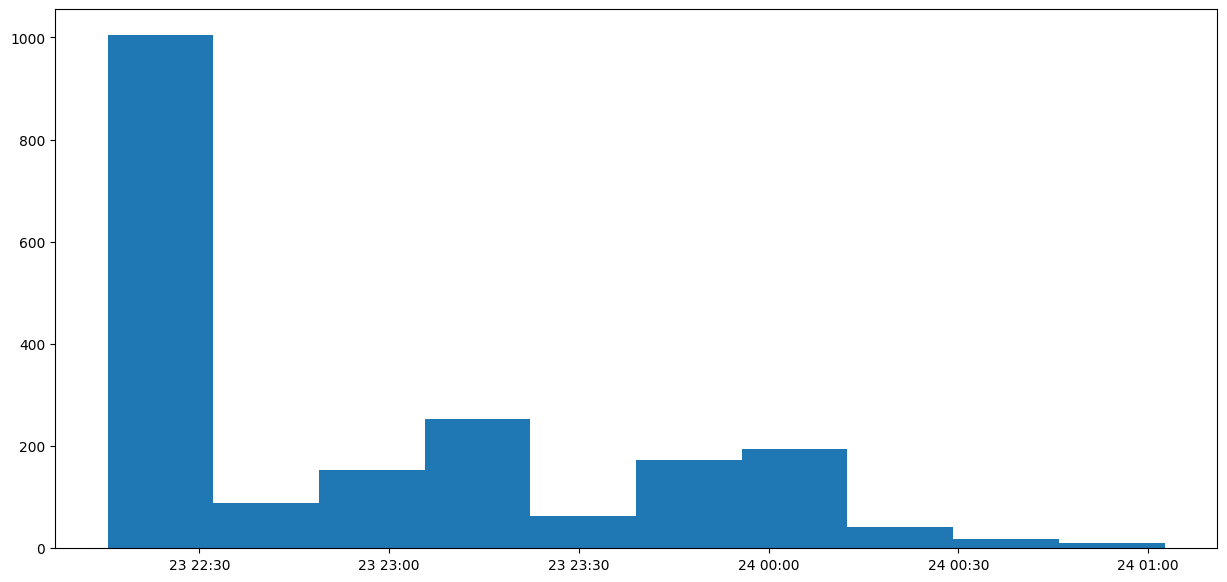

In [15]:
fig,ax = plt.subplots(figsize = (15,7))
ax.hist(df['Time'])
fig.show()

### Event log distribution

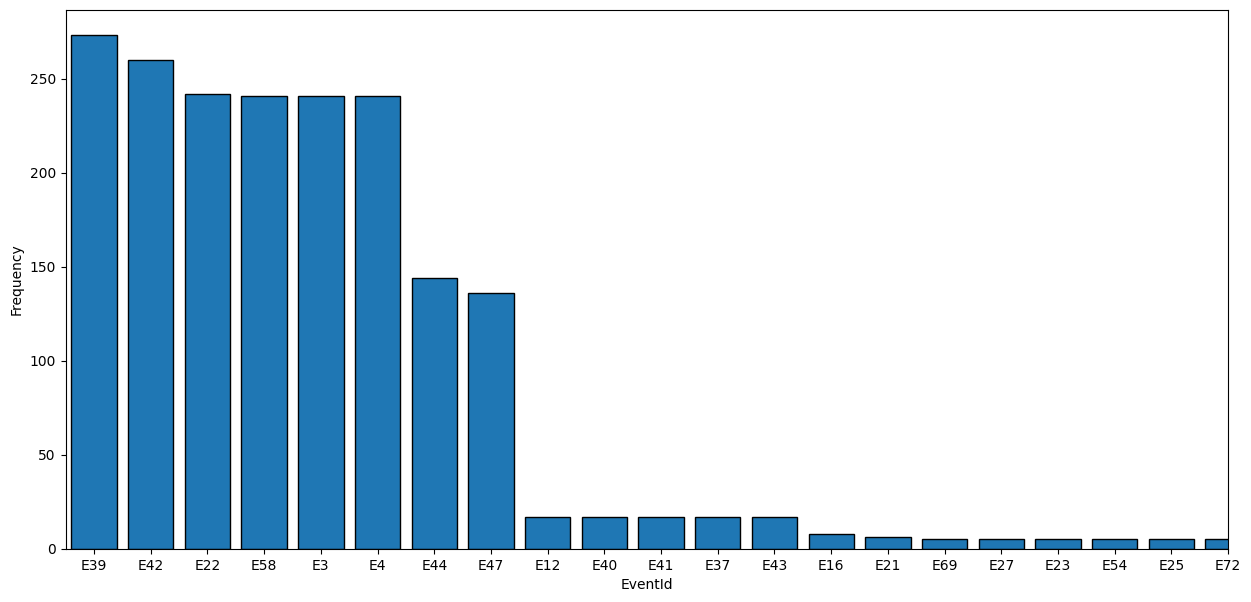

In [16]:
event = df['EventId'].value_counts()
fig,ax = plt.subplots(figsize=(15, 7))

ax.bar(event.index, event, edgecolor='black')
ax.set_xlim(-0.5,20)

# Customize the plot

ax.set_ylabel('Frequency')
ax.set_xlabel('EventId')

# Show the plot
fig.show()


Most frequent Events are E39 E42 E22 E58 E3 E4 E44 E47

In [17]:
frequent_events = ['E39', 'E42', 'E22', 'E58' ,'E3' ,'E4', 'E44', 'E47']

In [18]:
event_template_dict = dict(zip(df['EventId'], df['EventTemplate']))

In [19]:
event_templates = {event_id: event_template_dict.get(event_id) for event_id in frequent_events}
for event_id, event_template in event_templates.items():
    print(f"EventId: {event_id}\nEventTemplate: {event_template}\n")

EventId: E39
EventTemplate: onExtend:<*> <*> <*> <*>

EventId: E42
EventTemplate: onStandStepChanged <*>

EventId: E22
EventTemplate: getTodayTotalDetailSteps = <*>##<*>##<*>##<*>##<*>##<*>

EventId: E58
EventTemplate: setTodayTotalDetailSteps=<*>

EventId: E3
EventTemplate: calculateAltitudeWithCache totalAltitude=<*>

EventId: E4
EventTemplate: calculateCaloriesWithCache totalCalories=<*>

EventId: E44
EventTemplate: processHandleBroadcastAction action:android.intent.action.TIME_TICK

EventId: E47
EventTemplate: REPORT : <*> <*> <*> <*>



### Event **onExtend** variation with time

In [20]:
onExtend = df[df['EventId'] == 'E39'][['Time','Content']]
onExtend['onExtend'] = onExtend['Content'].str.extract(r':(\d+)').astype(float)
onExtend

,Time,Content,onExtend
1,2017-12-23 22:15:29.615,onExtend:1514038530000 14 0 4,1.514039e+12
11,2017-12-23 22:15:29.737,onExtend:1514038530000 0 0 4,1.514039e+12
14,2017-12-23 22:15:29.800,onExtend:1514038530000 1 0 4,1.514039e+12
21,2017-12-23 22:15:30.335,onExtend:1514038531000 1 0 4,1.514039e+12
28,2017-12-23 22:15:30.858,onExtend:1514038531000 2 0 4,1.514039e+12
...,...,...,...
1924,2017-12-24 00:11:57.149,onExtend:1514045517000 0 0 0,1.514046e+12
1934,2017-12-24 00:15:52.990,onExtend:1514045753000 0 0 0,1.514046e+12
1950,2017-12-24 00:25:16.146,onExtend:1514046316000 0 0 5,1.514046e+12
1956,2017-12-24 00:25:17.149,onExtend:1514046317000 0 0 0,1.514046e+12


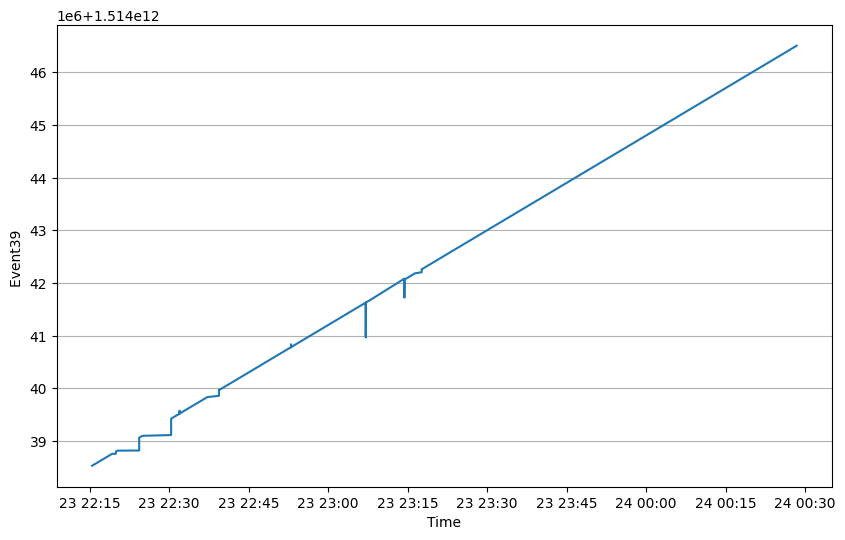

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(onExtend['Time'], onExtend['onExtend'])
plt.xlabel('Time')
plt.ylabel('Event39 ')
plt.grid(axis='y')
plt.show()

### **Calories Analysis**

In [22]:
calorie = df[df['EventId'] == 'E4'][['Time','Content']]
calorie['TotalCalories'] = calorie['Content'].str.extract(r'totalCalories=(\d+)').astype(float)
calorie

,Time,Content,TotalCalories
8,2017-12-23 22:15:29.645,calculateCaloriesWithCache totalCalories=126775,126775.0
17,2017-12-23 22:15:29.959,calculateCaloriesWithCache totalCalories=126797,126797.0
24,2017-12-23 22:15:30.639,calculateCaloriesWithCache totalCalories=126818,126818.0
31,2017-12-23 22:15:31.157,calculateCaloriesWithCache totalCalories=126861,126861.0
38,2017-12-23 22:15:32.156,calculateCaloriesWithCache totalCalories=126882,126882.0
...,...,...,...
1927,2017-12-24 00:11:57.449,calculateCaloriesWithCache totalCalories=0,0.0
1937,2017-12-24 00:15:53.292,calculateCaloriesWithCache totalCalories=0,0.0
1953,2017-12-24 00:25:16.445,calculateCaloriesWithCache totalCalories=0,0.0
1959,2017-12-24 00:25:17.445,calculateCaloriesWithCache totalCalories=0,0.0


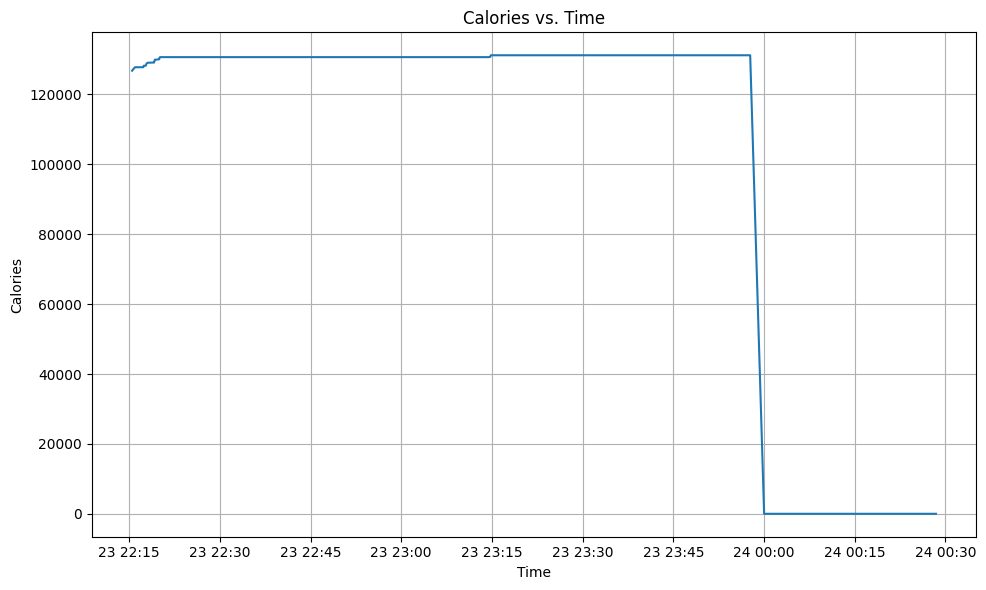

In [110]:
plt.figure(figsize=(10, 6))
plt.plot(calorie['Time'], calorie['TotalCalories'])
plt.xlabel('Time')
plt.ylabel('Calories')
plt.title('Calories vs. Time')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
126775/1800


70.43055555555556

**Total calories = 126775**. A person on average consumes 1800 calories per day. From this analysis, we find that this data is being stored from more than 70 days. Because the data we have is of 2 hours and 47 minutes during midnight, there is **no change in calories**. But after 12 PM, the data resets as we can see in the plot.

## **Screen Analysis**

In [107]:
import re # importing the regular expression into python

# Event_id = E40 for screen Off
# Event_id = E41 for screen ON

screen = df[df['EventId'].isin(['E41', 'E40'])]

def extract_screen_state(content):
    match = re.search(r'\bSCREEN_(ON|OFF)\b', content)
    return match.group(1) if match else None

# Apply the function to create a new column
screen['Screen_status'] = df['Content'].apply(extract_screen_state)
screen.head()

<ipython-input-107-05e404606069>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  screen['Screen_status'] = df['Content'].apply(extract_screen_state)


,LineId,Time,Component,Content,EventId,EventTemplate,Screen_status
2,3,2017-12-23 22:15:29.633,Step_StandReportReceiver,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,ON
64,65,2017-12-23 22:15:34.723,Step_StandReportReceiver,onReceive action: android.intent.action.SCREEN...,E40,onReceive action: android.intent.action.SCREEN...,OFF
74,75,2017-12-23 22:15:35.960,Step_StandReportReceiver,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,ON
679,680,2017-12-23 22:19:43.719,Step_StandReportReceiver,onReceive action: android.intent.action.SCREEN...,E40,onReceive action: android.intent.action.SCREEN...,OFF
684,685,2017-12-23 22:19:57.775,Step_StandReportReceiver,onReceive action: android.intent.action.SCREEN_ON,E41,onReceive action: android.intent.action.SCREEN_ON,ON


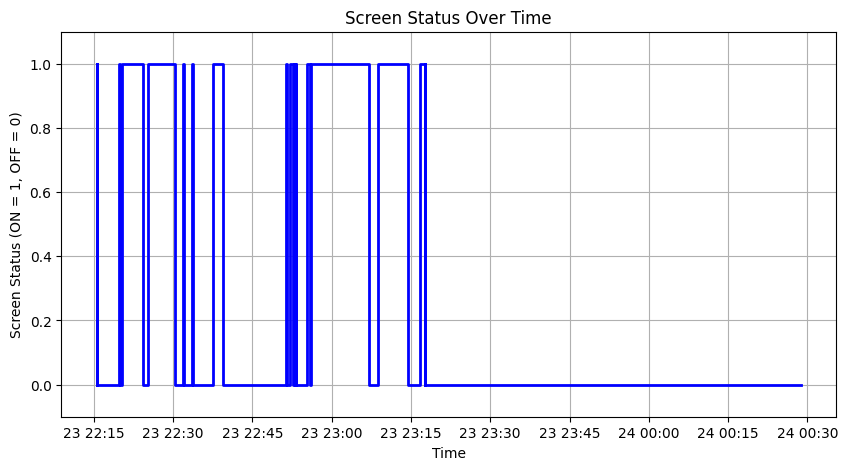

In [109]:
# Plotting
plt.figure(figsize=(10, 5))

# Assuming 'On' is represented by 1 and 'Off' is represented by 0
status_numeric = [1 if status == 'ON' else 0 for status in screen['Screen_status']]
plt.step(screen['Time'], status_numeric, where='pre', color='b', linewidth=2)

plt.title('Screen Status Over Time')
plt.xlabel('Time')
plt.ylabel('Screen Status (ON = 1, OFF = 0)')
plt.ylim([-0.1, 1.1])  # Set y-axis limits to better visualize On/Off states
plt.grid(True)
plt.show()

This step Graph shows when the screen is ON and When the screen is OFF

## **Altitude**

In [25]:
df[df['EventId']=='E3']

,LineId,Time,Component,Content,EventId,EventTemplate
9,10,2017-12-23 22:15:29.648,Step_ExtSDM,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>
18,19,2017-12-23 22:15:29.962,Step_ExtSDM,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>
25,26,2017-12-23 22:15:30.641,Step_ExtSDM,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>
32,33,2017-12-23 22:15:31.160,Step_ExtSDM,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>
39,40,2017-12-23 22:15:32.162,Step_ExtSDM,calculateAltitudeWithCache totalAltitude=240,E3,calculateAltitudeWithCache totalAltitude=<*>
...,...,...,...,...,...,...
1928,1929,2017-12-24 00:11:57.450,Step_ExtSDM,calculateAltitudeWithCache totalAltitude=0,E3,calculateAltitudeWithCache totalAltitude=<*>
1938,1939,2017-12-24 00:15:53.292,Step_ExtSDM,calculateAltitudeWithCache totalAltitude=0,E3,calculateAltitudeWithCache totalAltitude=<*>
1954,1955,2017-12-24 00:25:16.445,Step_ExtSDM,calculateAltitudeWithCache totalAltitude=0,E3,calculateAltitudeWithCache totalAltitude=<*>
1960,1961,2017-12-24 00:25:17.445,Step_ExtSDM,calculateAltitudeWithCache totalAltitude=0,E3,calculateAltitudeWithCache totalAltitude=<*>


In [26]:
df[df['EventId']=='E3']['Content'].value_counts()

calculateAltitudeWithCache totalAltitude=240    217
calculateAltitudeWithCache totalAltitude=0       24
Name: Content, dtype: int64

On 23-12-2017 He Tracked an Altitude of 240

## **Steps Analysis**

In [27]:
# Total steps today
df[df['EventId'].isin(['E71', 'E46'])]

,LineId,Time,Component,Content,EventId,EventTemplate
1793,1794,2017-12-24 00:00:00.234,Step_StandStepDataManager,tryToReloadTodayBasicSteps1514044800223|3786|0|0,E71,tryToReloadTodayBasicSteps<*>|<*>|<*>|<*>
1794,1795,2017-12-24 00:00:00.234,Step_StandStepDataManager,reload : 3786 restar 0,E46,reload : <*> restar <*>


Total steps in a Day **3786**

In [66]:
steps = df[df['EventId'] == 'E42']
steps['steps'] = steps['Content'].str.extract(r'(\d+)').astype(int)
steps.head()

<ipython-input-66-c5b6a2c7cdda>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steps['steps'] = steps['Content'].str.extract(r'(\d+)').astype(int)


,LineId,Time,Component,Content,EventId,EventTemplate,steps
0,1,2017-12-23 22:15:29.606,Step_LSC,onStandStepChanged 3579,E42,onStandStepChanged <*>,3579
7,8,2017-12-23 22:15:29.636,Step_LSC,onStandStepChanged 3579,E42,onStandStepChanged <*>,3579
12,13,2017-12-23 22:15:29.738,Step_LSC,onStandStepChanged 3579,E42,onStandStepChanged <*>,3579
13,14,2017-12-23 22:15:29.792,Step_LSC,onStandStepChanged 3580,E42,onStandStepChanged <*>,3580
20,21,2017-12-23 22:15:30.331,Step_LSC,onStandStepChanged 3581,E42,onStandStepChanged <*>,3581


In [67]:
steps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260 entries, 0 to 1964
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   LineId         260 non-null    int64         
 1   Time           260 non-null    datetime64[ns]
 2   Component      260 non-null    object        
 3   Content        260 non-null    object        
 4   EventId        260 non-null    object        
 5   EventTemplate  260 non-null    object        
 6   steps          260 non-null    int64         
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 16.2+ KB


In [68]:
min_steps = steps['steps'].min()
max_steps = steps['steps'].max()
steps_in_3hr =  (max_steps - min_steps)
print(f'Minimum steps : {min_steps}\nMaximum steps : {max_steps}\nSteps in Three hours : {steps_in_3hr}')

Minimum steps : 3579
Maximum steps : 3786
Steps in Three hours : 207


So He/she took **207** steps in Three hours

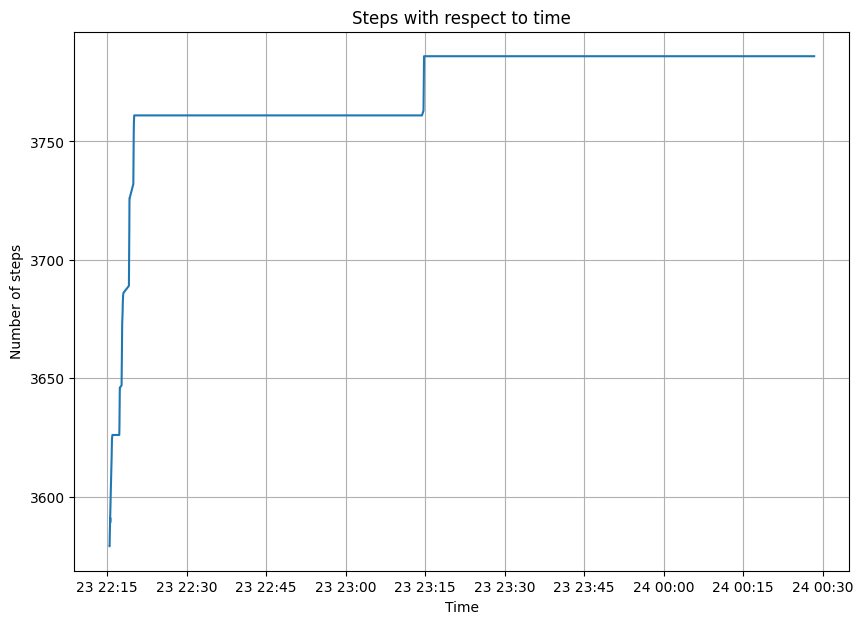

In [111]:
plt.figure(figsize = (10,7))
plt.plot(steps['Time'], steps['steps'])
plt.xlabel('Time')
plt.ylabel('Number of steps')
plt.title('Steps with respect to time')
plt.grid(True)
plt.show()

He took **207 steps from 22:15 to 23:15** after that no activity is recorded my be he goes to bed after that.